# Customer Churn Prediction Using Artificial Neural Network (ANN)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

# Data Preprocessing

In [2]:
data = pd.read_csv(r'Bank Turnover Dataset.csv')
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.drop(['RowNumber','Surname','CustomerId'],axis='columns',inplace=True)

In [4]:
def print_unique_col_values(df):  #A function that is able to check whether all the columns are numeric or not.
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 
            else:
                print("Numeric")
print_unique_col_values(data)

Numeric
Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric


In [5]:
data['Gender'].replace({'Male':1,'Female':0},inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


#### Converting text columns to numeric using one hot encoding (Geography)


In [6]:
data_final = pd.get_dummies(data=data,columns=['Geography'])
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [7]:
#Dropping  column of Germany_Spain to avoid the dummy variable trap
data_final.drop('Geography_Spain',axis='columns',inplace=True)
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


In [8]:
#Now verifying that all of our columns have been converted to numeric data or not
print_unique_col_values(data_final)

Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric
Numeric


In [9]:
#Checking for null values
data_final.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
dtype: int64

# Data Visualization

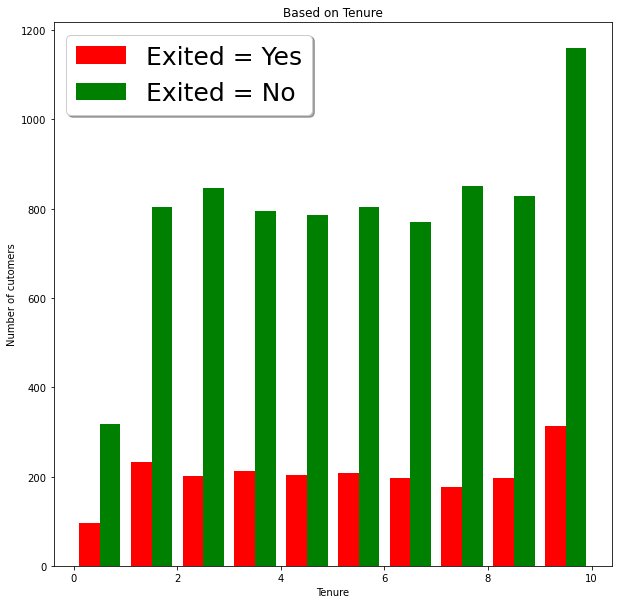

In [10]:
cust_exited_yes = data[data.Exited==1].Tenure
cust_exited_no = data[data.Exited==0].Tenure
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Based on Tenure")
plt.xlabel("Tenure")
plt.ylabel("Number of cutomers")
plt.rcParams.update({'font.size': 25})
plt.hist([cust_exited_yes,cust_exited_no],rwidth=0.8,label=['Exited = Yes','Exited = No'],color=['red','green'])
plt.legend(shadow=True)

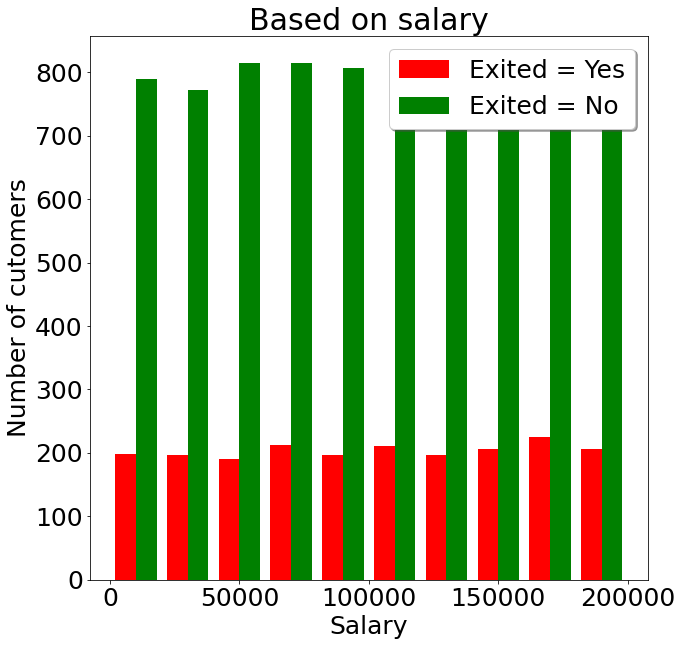

In [11]:
cust_exited_yes = data[data.Exited==1].EstimatedSalary
cust_exited_no = data[data.Exited==0].EstimatedSalary
plt.title("Based on salary")
plt.rcParams["figure.figsize"] = (10,10)
plt.xlabel("Salary")
plt.ylabel("Number of cutomers")
plt.rcParams.update({'font.size': 25})
plt.hist([cust_exited_yes,cust_exited_no],rwidth=0.8,label=['Exited = Yes','Exited = No'],color=['red','green'])
plt.legend(shadow=True)

# Training Model

In [12]:
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0


In [13]:
# Make sure that all the columns are scaled between 0 and 1.
columns_to_scale = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data_final[columns_to_scale] = scale.fit_transform(data_final[columns_to_scale])
data_final.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1,1,0
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0,0,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1,1,0
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0,1,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0,0,0


In [27]:
X = data_final.drop('Exited',axis='columns')
y = data_final['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=True)

In [24]:
X_train.shape

(8000, 11)

In [51]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(11,),activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',       #Because the exit state is like binary
    metrics=['accuracy'])             
model.fit(X_train,y_train,epochs=16)   
# Assigning less epochs to reduce the computational cost and overfitting
                                            

Epoch 1/16
250/250 [==============================] - 1s 2ms/step - loss: 0.4463 - accuracy: 0.8045
Epoch 2/16
250/250 [==============================] - 1s 2ms/step - loss: 0.3889 - accuracy: 0.8363
Epoch 3/16
250/250 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8491
Epoch 4/16
250/250 [==============================] - 1s 2ms/step - loss: 0.3599 - accuracy: 0.8509
Epoch 5/16
250/250 [==============================] - 0s 2ms/step - loss: 0.3533 - accuracy: 0.8560
Epoch 6/16
250/250 [==============================] - 1s 2ms/step - loss: 0.3489 - accuracy: 0.8561
Epoch 7/16
250/250 [==============================] - 0s 2ms/step - loss: 0.3461 - accuracy: 0.8572
Epoch 8/16
250/250 [==============================] - 0s 2ms/step - loss: 0.3387 - accuracy: 0.8609
Epoch 9/16
250/250 [==============================] - 1s 2ms/step - loss: 0.3370 - accuracy: 0.8621
Epoch 10/16
250/250 [==============================] - 1s 2ms/step - loss: 0.3336 - accuracy: 0.8645

#### 99% accuracy achieved on training data

# Testing accuracy on test data

In [60]:
model.evaluate(X_test,y_test)
# 86 accuracy achieved

63/63 [==============================] - 0s 982us/step - loss: 0.3417 - accuracy: 0.8595


[0.34173205494880676, 0.859499990940094]